In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
## Reading the data
df=pd.read_csv('data/Mall_Customers.csv')

In [30]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Univariate analysis

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [57]:
def plot_hist_by_sns(df,df_col):
    # Seaborn histogram with KDE curve
    sns.histplot(df[df_col], kde=True, color="skyblue", edgecolor="black")
    
    # Adding labels and title
    plt.title(f"Distribution of {df_col}", fontsize=14, fontweight="bold", pad=10)
    plt.xlabel(df_col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
    
    plt.show()

In [61]:
for col in df.columns:
    print(col)

CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100)


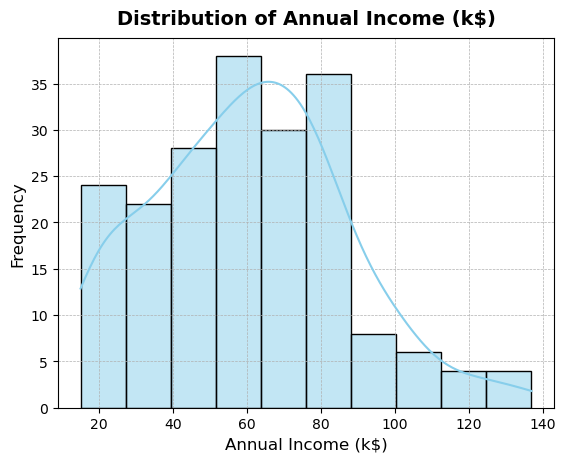

In [69]:
plot_hist_by_sns(df,df.columns[3])

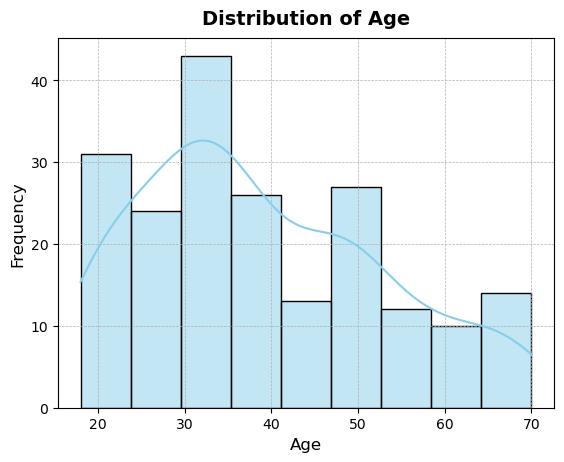

In [67]:
plot_hist_by_sns(df,df.columns[2])

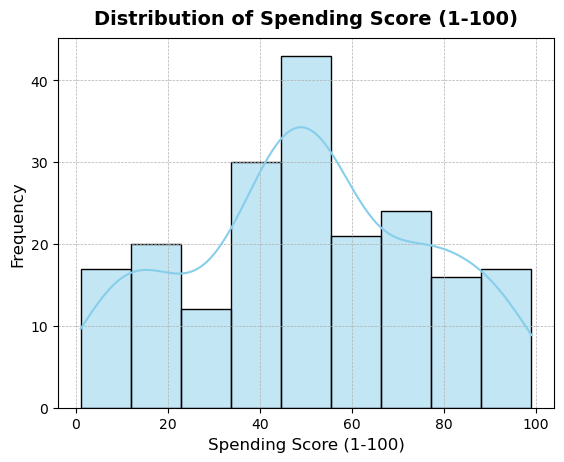

In [71]:
plot_hist_by_sns(df,df.columns[4])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

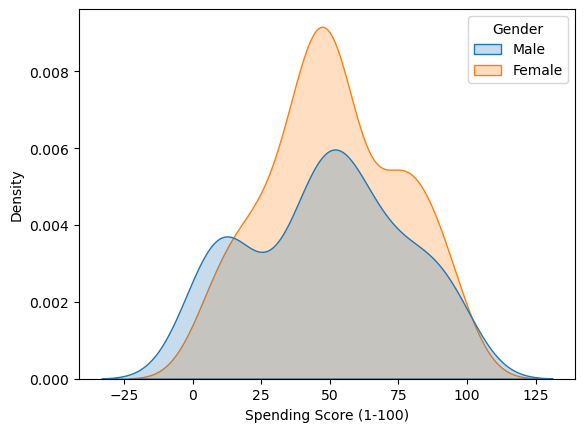

In [94]:
sns.kdeplot(x=df[df.columns[4]],fill=True,hue=df['Gender'])

In [98]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

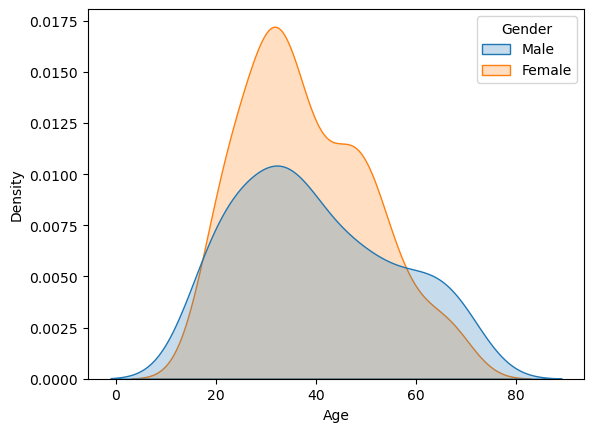

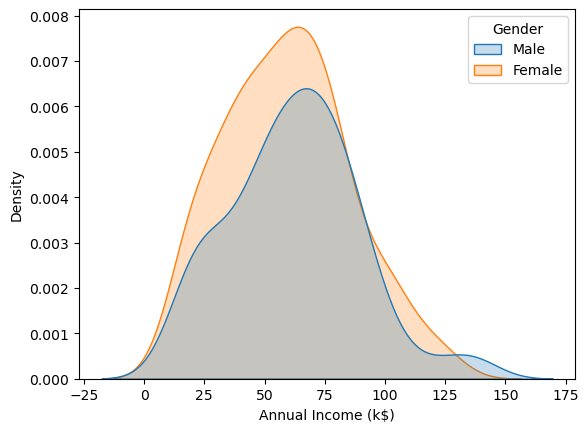

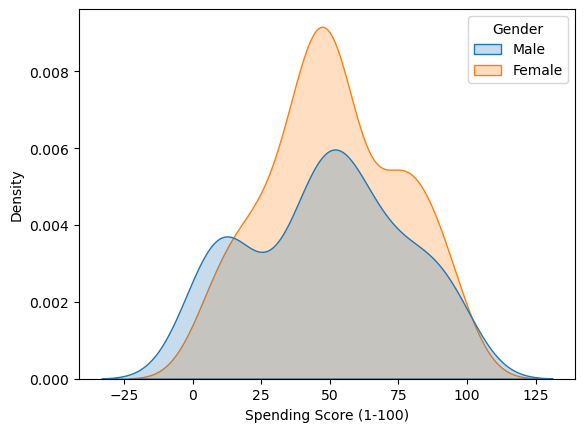

In [114]:
for col in df.columns[2:]:
    sns.kdeplot(x=df[col],fill=True,hue=df['Gender'])
    plt.show()

In [118]:
df.columns[]

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

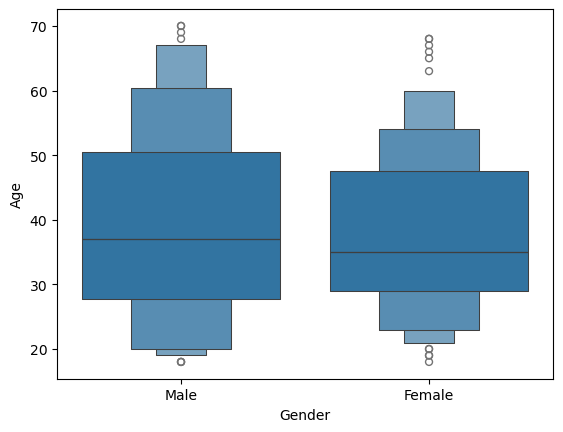

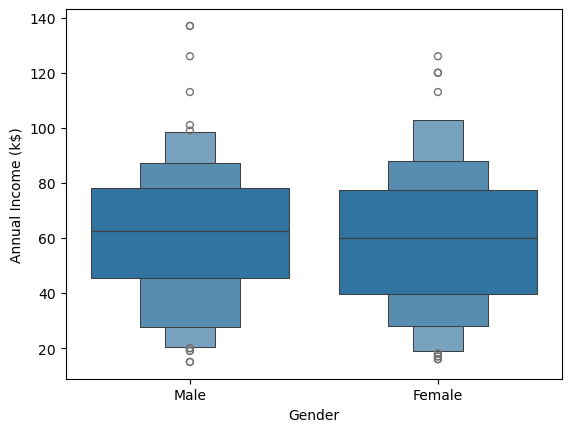

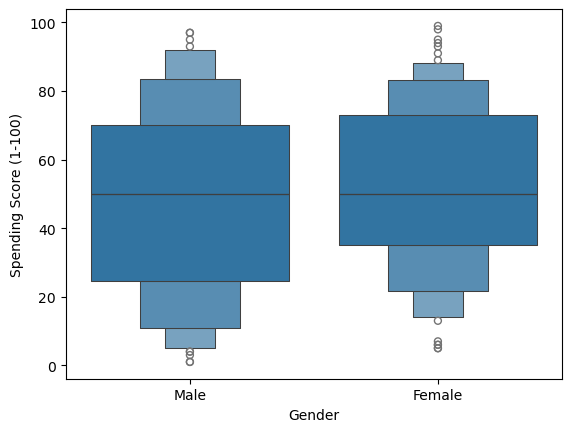

In [124]:
for col in df.columns[2:]:
    sns.boxenplot(data=df,x='Gender',y=df[col])
    plt.show()

In [132]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate analysis

In [137]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

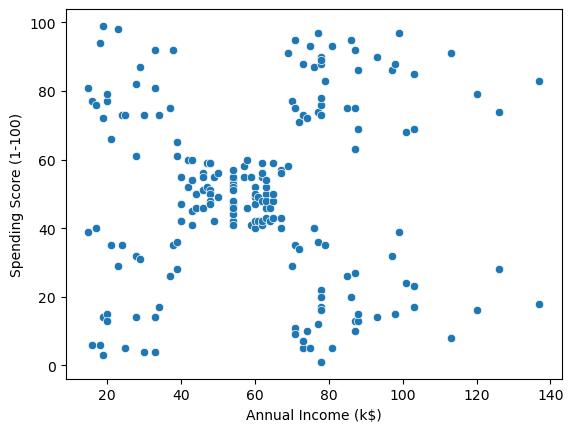

In [139]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

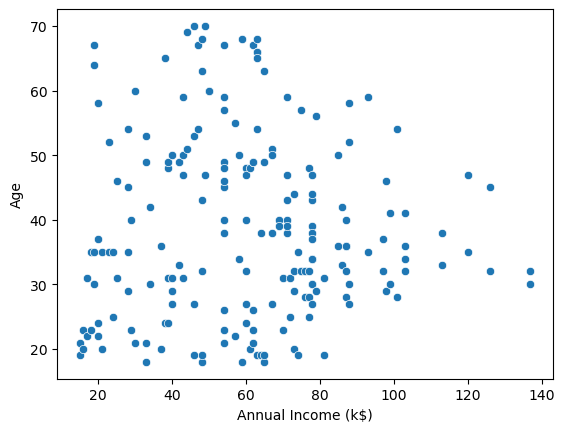

In [141]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Age')

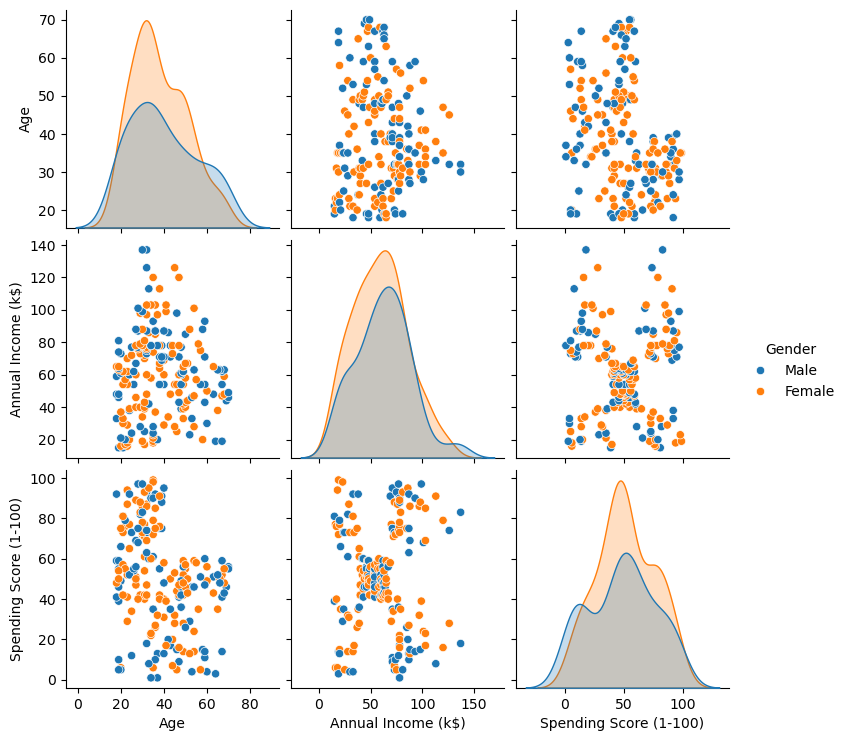

In [147]:
#df=df.drop(df.columns[0],axis=1)
sns.pairplot(data=df,hue='Gender')

In [149]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [155]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

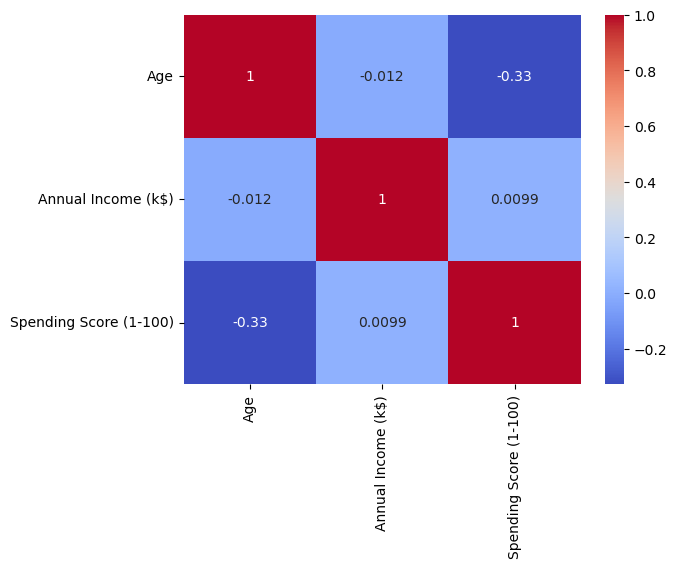

In [165]:
sns.heatmap(data=df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(),annot=True,cmap='coolwarm')

## Clusting Univariate

In [190]:
clustring_by1=KMeans(n_clusters=5)

In [192]:
clustring_by1.fit(df[['Annual Income (k$)']])

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [194]:
clustring_by1.n_clusters

5

In [196]:
clustring_by1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3])

In [198]:
df['income cluster']=clustring_by1.labels_

In [200]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [202]:
df['income cluster'].value_counts()

income cluster
2    66
1    52
4    38
0    36
3     8
Name: count, dtype: int64

In [204]:
clustring_by1.inertia_

9437.49139164929